In [16]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [18]:

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
#plt.style.use('seaborn')

## Create synthetic signal
dt = 0.001
t = np.arange(0, 1, dt)
signal_clean = signal #copy for later comparison
signal = signal + 2.5 * np.random.randn(len(t))
minsignal, maxsignal = signal.min(), signal.max()

In [19]:
## Compute Fourier Transform
n = len(t)
fhat = np.fft.fft(signal, n) #computes the fft
psd = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n) #frequency array
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index

In [20]:
## Filter out noise
threshold = 100
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat #used to retrieve the signal

signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform

/Users/locle/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


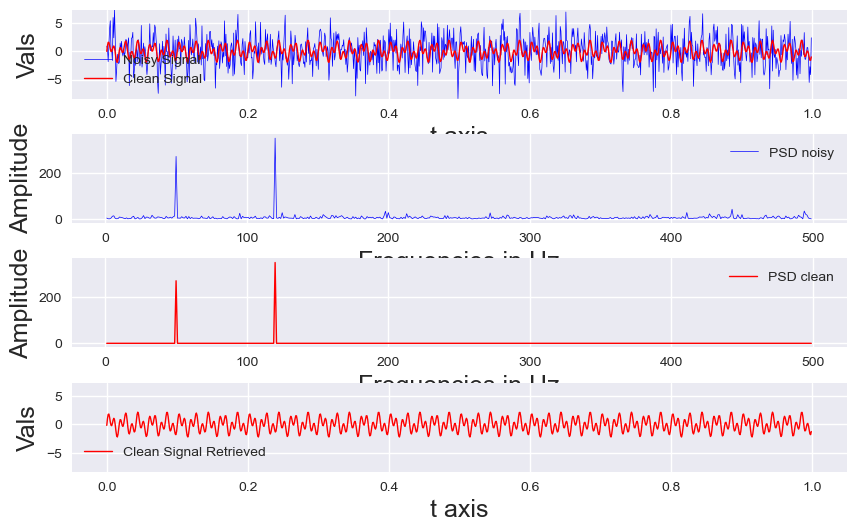

In [21]:
## Visualization
fig, ax = plt.subplots(4,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
ax[0].plot(t, signal_clean, color='r', lw=1, label='Clean Signal')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Vals')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, label='PSD noisy')
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies in Hz')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal Retrieved')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Vals')
ax[3].legend()

plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)